#### DESCRIPTION

- The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

**Data Dictionary**
- UserID – 4848 customers who provided a rating for each movie
- Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

**Data Considerations**
- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
- Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

**Analysis Task**
1. Exploratory Data Analysis:

   1. Which movies have maximum views/ratings?
   2. What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
   3. Define the top 5 movies with the least audience.
2. Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

   1. Divide the data into training and test data
   2. Build a recommendation model on training data
   3. Make predictions on the test data

In [4]:
#importing all the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import surprise

In [5]:
df_review = pd.read_csv("Amazon.csv")
df_review.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_review.shape

(4848, 207)

## Analysis Task

## Task 1: Exploratory Data Analysis:

### Task 1(A): Which movie have maximum views/ratings?

In [7]:
description = df_review.describe().T
description

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


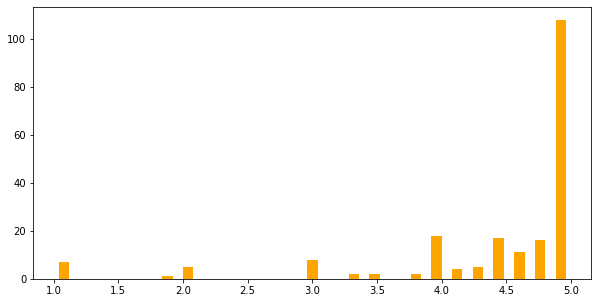

In [8]:
#description['mean'].plot(bins=25, kind='hist', color = 'indianred')
plt.figure(figsize=(10,5))
plt.hist(description['mean'], bins=25, color = 'orange', rwidth=.5)
plt.show()

In [9]:
description2 = description['count'].sort_values(ascending=False).to_frame()
description2.head(10)

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0
Movie91,128.0
Movie92,101.0
Movie89,83.0
Movie158,66.0
Movie108,54.0


**Observation: <i>The above table shows the top 10 Movies with their count(How many users view/rate a movie) soted in descending order</i>**

### Task 1(B): What is the average rating for each movie? Define the top 5 movies with the maximum ratings

In [10]:
rate_df = df_review.drop("user_id", axis = 1)
averag_rate = rate_df.mean().sort_values(ascending=False).to_frame().rename(columns={0 : "Avereage Rating"})
averag_rate.head(5)

,Avereage Rating
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


**Observation 1:<i> The above table shows the top 5 movies with maximum average ratings.</i>**

**Observation 2: <i>There is a posibility that those movies are just only rated once by single user to verify this we have to count the number of reviews provided.</i>**

In [11]:
averag_rate['count'] = description2['count']
averag_rate

,Avereage Rating,count
Movie1,5.0,1.0
Movie66,5.0,1.0
Movie76,5.0,2.0
Movie75,5.0,1.0
Movie74,5.0,1.0
...,...,...
Movie58,1.0,1.0
Movie60,1.0,1.0
Movie154,1.0,1.0
Movie45,1.0,1.0


**Observation: <i>The above table shows top 10 movies with maximum average ratings, it is clearly seen that most of these movies are rated by one user only</i>**

<b><i> Note: It coulb be possible that there are many movies rating which is only provided by one user.</i></b>

In [12]:
averag_rate[averag_rate["count"] == 1]

,Avereage Rating,count
Movie1,5.0,1.0
Movie66,5.0,1.0
Movie75,5.0,1.0
Movie74,5.0,1.0
Movie143,5.0,1.0
...,...,...
Movie58,1.0,1.0
Movie60,1.0,1.0
Movie154,1.0,1.0
Movie45,1.0,1.0


**Observation:<i> The above table shows that there are total of 89 movies which are reviewed by only one user.</i>**

### Task 1(C): Define the top 5 movies with the least audience

In [13]:
least_aud = averag_rate["count"].sort_values().to_frame()
least_aud.head(5)

,count
Movie1,1.0
Movie34,1.0
Movie35,1.0
Movie36,1.0
Movie37,1.0


**Observation: <i>Above table shows top 5 movies with least audience</i>**

## Task 2: Recomendation Model

In [20]:
#importing required libraries for Recomendation model
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Dataset

In [21]:
help(df_review.melt)

Help on method melt in module pandas.core.frame:

melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level: 'Level | None' = None, ignore_index: 'bool' = True) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' 

In [22]:
df_review.columns

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

In [23]:
melt_review_df = df_review.melt(id_vars= df_review.columns[0], value_vars=df_review.columns[1:], var_name="Movie_name", value_name="rating")
melt_review_df

,user_id,Movie_name,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [24]:
reader = Reader(rating_scale=(-1,10))

data = Dataset.load_from_df(melt_review_df, reader=reader)
data2 = Dataset.load_builtin